<a href="https://colab.research.google.com/github/tangpnm/AI_CountingCoin/blob/master/ALAI3_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from PIL import Image
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

# **TRAIN**

**Import class for COVID images of training set**

In [ ]:
train_x=[]

path=r'/content/drive/My Drive/cognitive computing/Data/datasets/train/positive/*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

**Create train_y pf size COVID**

In [ ]:
a=len(train_x)
train_y=np.zeros(a)

**Import class for NORMAL images of training set**

In [ ]:
path=r'/content/drive/My Drive/cognitive computing/Data/datasets/train/negative/*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

**Concatenate with the COVID training set to be in trainx**

In [ ]:
b=len(train_x)
trainy=np.concatenate((train_y,np.ones(b-a)))

In [ ]:
print(b)

0


In [ ]:
trainx = np.stack(train_x) # Converts the list of arrays to a array of arrays

ValueError: ignored

In [ ]:
len(trainx)

115

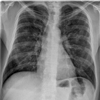

In [ ]:
img = tf.keras.preprocessing.image.array_to_img(trainx[0]) 
img

# **VALID**

**Import class normal for validation set**

In [ ]:
val_x=[]

path=r'/content/drive/My Drive/cognitive computing/Data/dataset/normal/*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

**Create val_y of size NORMAL validation set**

In [ ]:
a=len(val_x)
val_y=np.zeros(a)

**Import class COVID for validation set**

In [ ]:
path=r'/content/drive/My Drive/cognitive computing/Data/dataset/covid/*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

**Concatenate of validation set to be valx**

In [ ]:
b=len(val_x)
valy=np.concatenate((val_y,np.ones(b-a)))

In [ ]:
valx = np.stack(val_x)

In [ ]:
print('train shape : ',trainx.shape)
print('valid shape : ',valx.shape)

train shape :  (115, 100, 100, 1)
valid shape :  (42, 100, 100, 1)


# **TEST**

**Import NORMAL class for test set**

In [ ]:
test_x=[]

path=r'/content/drive/My Drive/cognitive computing/Data/datasets/test/negative/*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))


**Create test_y for test set**

In [ ]:
a=len(test_x)
test_y=np.zeros(a)

**Import COVID class for test set**

In [ ]:
path=r'/content/drive/My Drive/cognitive computing/Data/datasets/test/positive/*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

**Concatenate for test set both NORMAL and COVID**

In [ ]:
b=len(test_x)
testy=np.concatenate((test_y,np.ones(b-a)))

In [ ]:
testx = np.stack(test_x) # Converts the list of arrays to a array of arrays

In [ ]:
tx,vx,ty,vy=train_test_split(trainx,trainy)

# **TRAIN MODEL**

In [ ]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
])

model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size=20,epochs=30,callbacks=[es])

Epoch 1/30
5/5 [==============================] - 0s 31ms/step - loss: 31.3934 - accuracy: 0.5116 - val_loss: 1.6831 - val_accuracy: 0.4483
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 7.6074 - accuracy: 0.4070 - val_loss: 0.8916 - val_accuracy: 0.5517
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 1.4914 - accuracy: 0.6163 - val_loss: 0.7342 - val_accuracy: 0.4483
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 1.3285 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.6897
Epoch 5/30
5/5 [==============================] - 0s 9ms/step - loss: 0.7065 - accuracy: 0.6860 - val_loss: 0.6124 - val_accuracy: 0.7931
Epoch 6/30
5/5 [==============================] - 0s 9ms/step - loss: 0.7208 - accuracy: 0.6744 - val_loss: 0.6401 - val_accuracy: 0.7931
Epoch 7/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5483 - accuracy: 0.7558 - val_loss: 0.6243 - val_accuracy: 0.8276
Epoch 8/30
5/5 [===============

**VISUALIZE the performance the accuracy**

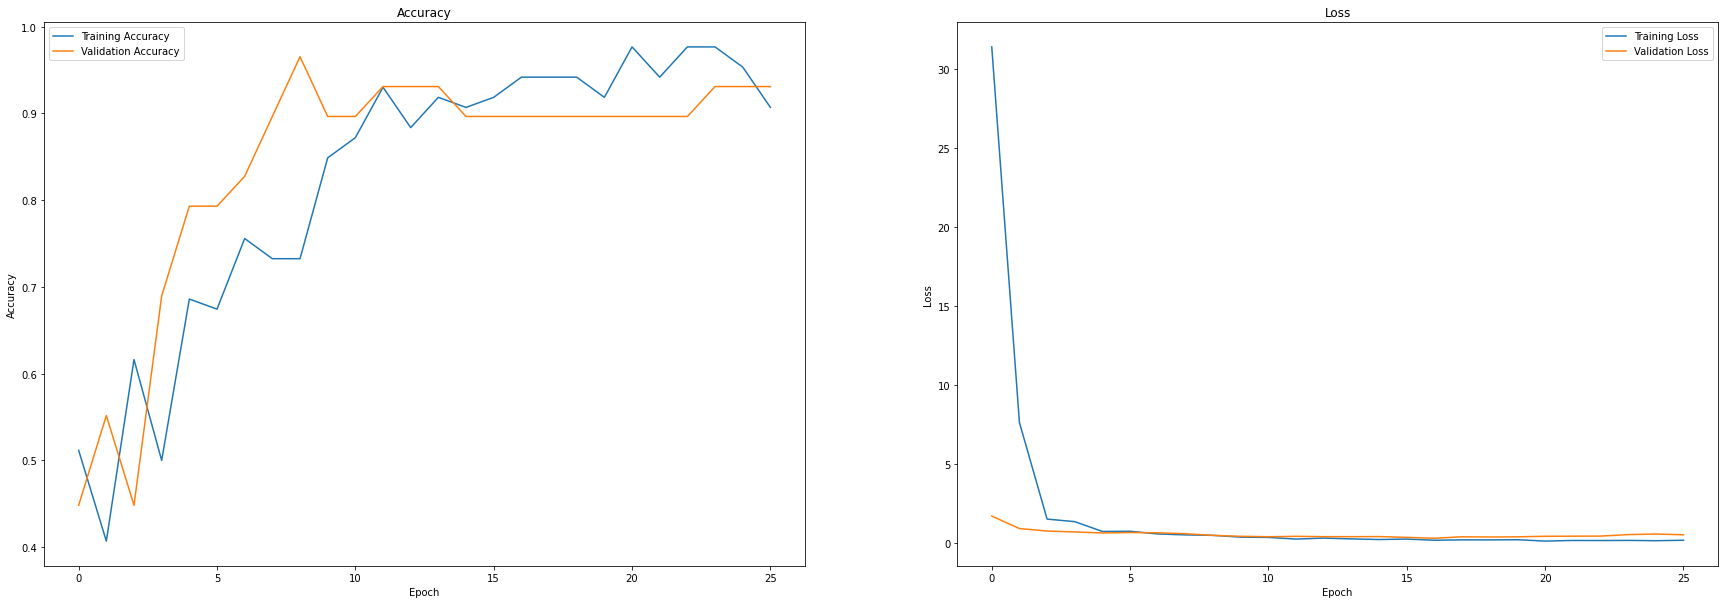

In [ ]:
fig=plt.subplots(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])

plt.show()


**Predicting the model**

In [ ]:
pred=model.predict(testx)

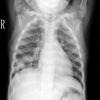

In [ ]:
img = tf.keras.preprocessing.image.array_to_img(testx[0]) 
img

**create the confusion matrix**

In [ ]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=0
    else:
        pred[i]=1

tf.math.confusion_matrix(testy,pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[41,  1],
       [23, 36]], dtype=int32)>